# Gradient Descent for Linear Regression
**Author:** Dr. Rishikesh Yadav / Vedant Vibhor   

## Introduction

In this notebook, we demonstrate the implementation of a gradient descent algorithm for linear regression. Our goal is to fit a linear model to synthetic data and visualize the results. We will cover the following steps:

1. Defining the loss function and its gradient
2. Implementing the gradient descent algorithm
3. Generating synthetic data
4. Running the gradient descent and visualizing the results

In [1]:
# Setup: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set matplotlib to inline for Jupyter notebooks
%matplotlib inline 

# Set random seed for reproducibility
np.random.seed(42)

## Linear Prediction Function

We define a function to predict y using the linear model.

In [2]:
def predict_linear(X, w):
    """
    Linear prediction function: y = w[0] + w[1] * x
    
    Parameters:
    X: numpy array of input features
    w: numpy array of coefficients [intercept, slope]
    
    Returns:
    numpy array: predicted values
    """
    return w[0] + w[1] * X

## Define the Loss Function and Gradient

We define the Mean Squared Error (MSE) as the loss function and its gradient for linear regression.

In [3]:
def loss_function_linear(w, X, y):
    """
    Calculate Mean Squared Error loss for linear regression.
    
    Parameters:
    w: numpy array of coefficients [intercept, slope]
    X: numpy array of input features
    y: numpy array of target values
    
    Returns:
    float: Mean squared error
    """
    y_pred = predict_linear(X, w)
    mse = np.mean((y - y_pred)**2)
    return mse

def gradient_linear(w, X, y):
    """
    Calculate gradient of the loss function for linear regression.
    
    Parameters:
    w: numpy array of coefficients [intercept, slope]
    X: numpy array of input features
    y: numpy array of target values
    
    Returns:
    numpy array: gradients [grad_intercept, grad_slope]
    """
    y_pred = predict_linear(X, w)
    n = len(y)
    
    # Gradient for intercept (w[0])
    grad_intercept = -2 * np.mean(y - y_pred)
    
    # Gradient for slope (w[1])
    grad_slope = -2 * np.mean((y - y_pred) * X)
    
    return np.array([grad_intercept, grad_slope])

## Gradient Descent Algorithm

We implement the gradient descent algorithm to optimize the coefficients of the linear model.

In [4]:
def gradient_descent_linear(X, y, learning_rate, iterations):
    """
    Gradient descent algorithm for linear regression.
    
    Parameters:
    X: numpy array of input features
    y: numpy array of target values
    learning_rate: float, learning rate for gradient descent
    iterations: int, number of iterations
    
    Returns:
    pandas DataFrame: history of coefficients and loss values
    """
    # Initialize coefficients to zero
    w = np.array([0.0, 0.0])
    
    # Initialize history tracking
    history = {
        'iteration': [],
        'intercept': [],
        'slope': [],
        'loss': []
    }
    
    for i in range(iterations):
        # Compute gradients
        grads = gradient_linear(w, X, y)
        
        # Update coefficients using gradient descent
        w = w - learning_rate * grads
        
        # Compute loss
        loss = loss_function_linear(w, X, y)
        
        # Store history
        history['iteration'].append(i + 1)
        history['intercept'].append(w[0])
        history['slope'].append(w[1])
        history['loss'].append(loss)
    
    return pd.DataFrame(history)

## Generate Synthetic Data

We generate synthetic data for the linear regression model.

In [5]:
# Generate synthetic data
n = 1000  # Number of data points
X = np.random.normal(0, 1, n)  # Generate random normal data for x
y = 2 + 3 * X + np.random.normal(0, 1, n)  # Generate y with linear relationship and noise

print(f"Generated {n} data points")
print(f"True parameters: intercept = 2, slope = 3")
print(f"Data statistics:")
print(f"  X: mean = {np.mean(X):.4f}, std = {np.std(X):.4f}")
print(f"  y: mean = {np.mean(y):.4f}, std = {np.std(y):.4f}")

Generated 1000 data points
True parameters: intercept = 2, slope = 3
Data statistics:
  X: mean = 0.0193, std = 0.9787
  y: mean = 2.1288, std = 3.0624


## Scatter Plot of the Data

We visualize the generated synthetic data with a scatter plot.

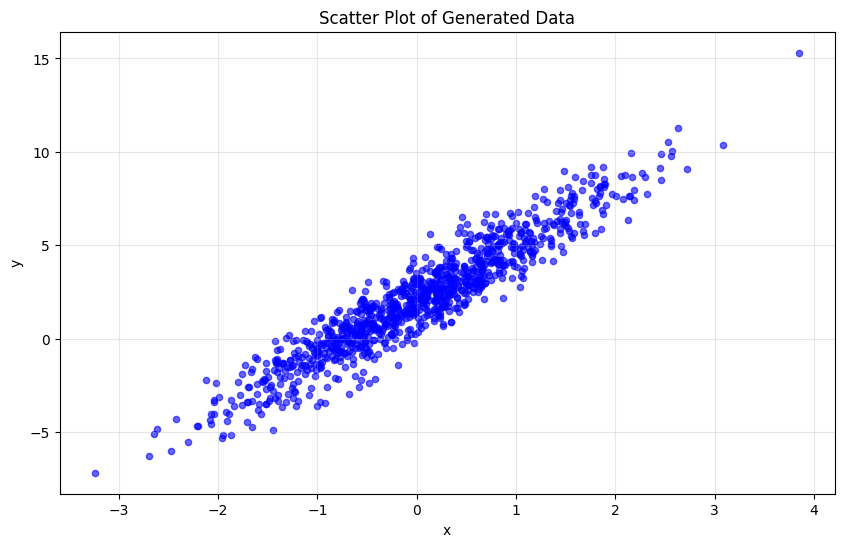

In [6]:
# Create scatter plot of the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Generated Data')
plt.grid(True, alpha=0.3)
plt.show()

## Perform Gradient Descent

We run the gradient descent algorithm to find the optimal coefficients.

In [7]:
# Set parameters for gradient descent
learning_rate = 0.01
iterations = 1000

print(f"Running gradient descent with:")
print(f"  Learning rate: {learning_rate}")
print(f"  Iterations: {iterations}")

# Perform gradient descent
history = gradient_descent_linear(X, y, learning_rate, iterations)

# Display final results
final_intercept = history['intercept'].iloc[-1]
final_slope = history['slope'].iloc[-1]
final_loss = history['loss'].iloc[-1]

print(f"\nFinal results:")
print(f"  Estimated intercept: {final_intercept:.6f} (true: 2.0)")
print(f"  Estimated slope: {final_slope:.6f} (true: 3.0)")
print(f"  Final loss: {final_loss:.6f}")

Running gradient descent with:
  Learning rate: 0.01
  Iterations: 1000

Final results:
  Estimated intercept: 2.071632 (true: 2.0)
  Estimated slope: 2.958848 (true: 3.0)
  Final loss: 0.992298


## Visualize the Results

We create plots to visualize the data, the final regression line, and the convergence of the loss function, intercept, and slope.

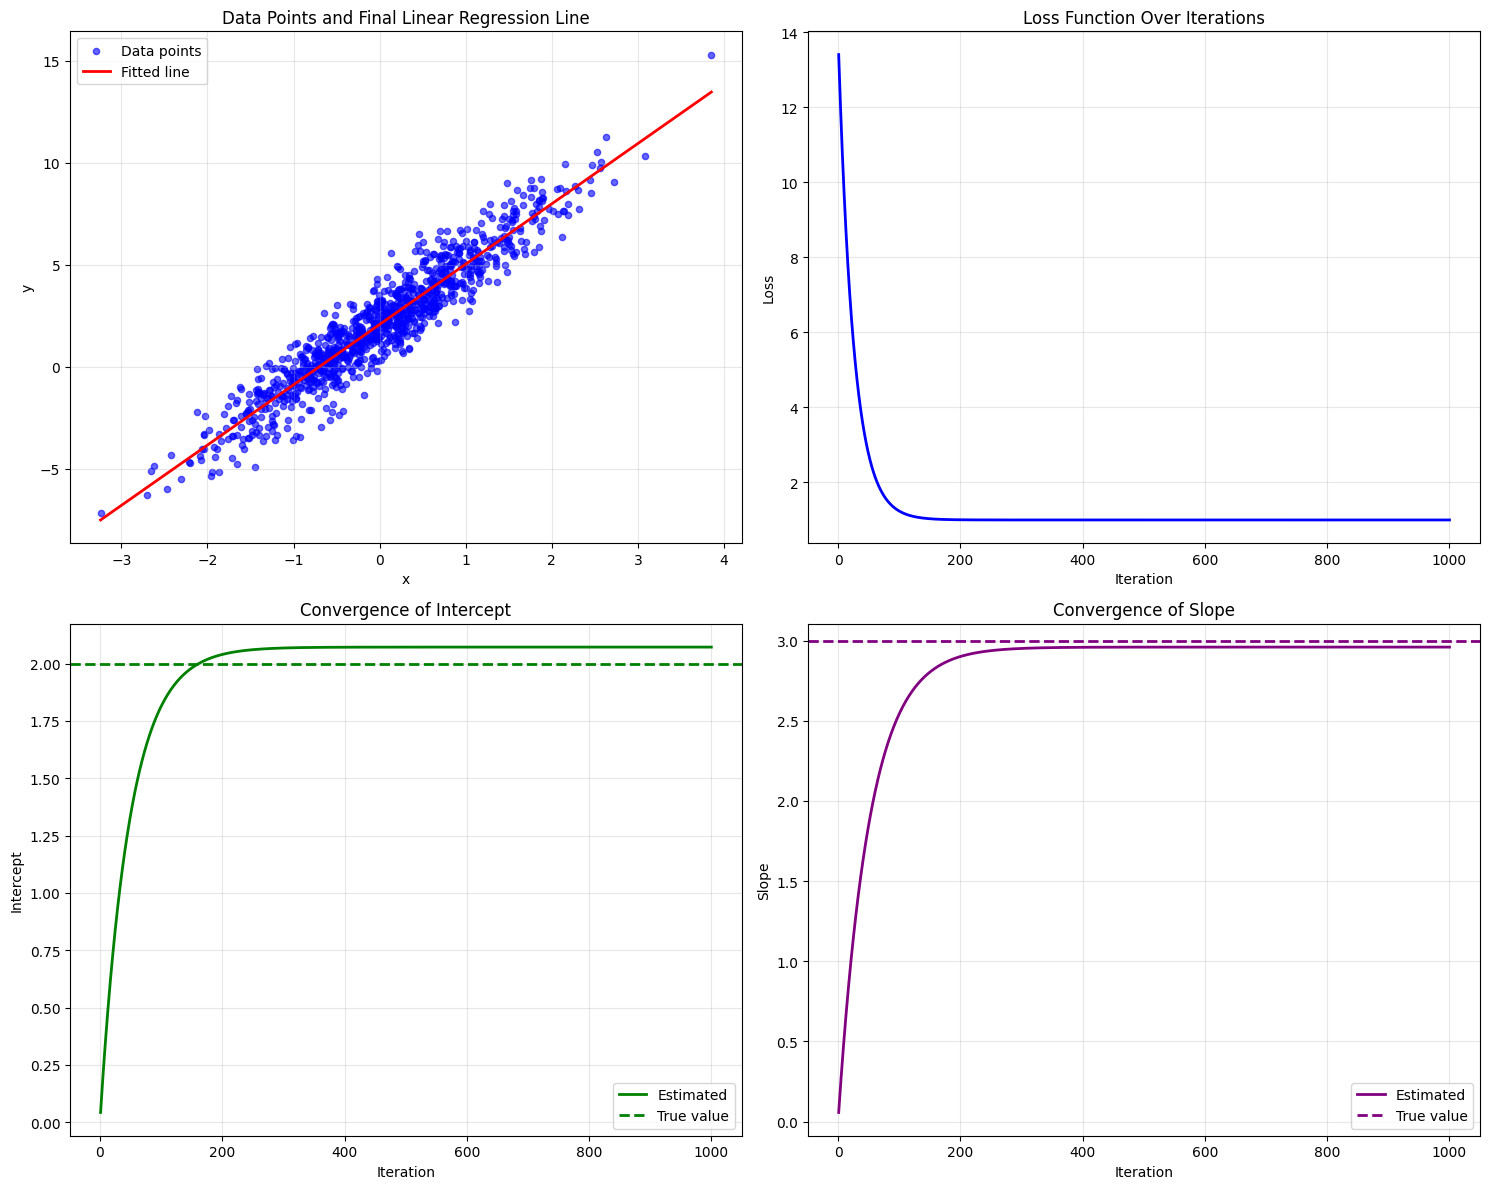

In [8]:
# Create a 2x2 subplot layout
fig = plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)

# Plot 1: Data points and final regression line
plt.scatter(X, y, alpha=0.6, color='blue', s=20, label='Data points')
y_pred_final = predict_linear(X, np.array([final_intercept, final_slope]))
plt.plot(np.sort(X), y_pred_final[np.argsort(X)], color='red', linewidth=2, label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Final Linear Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss function over iterations
plt.subplot(2, 2, 2)
plt.plot(history['iteration'], history['loss'], color='blue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations')
plt.grid(True, alpha=0.3)

# Plot 3: Convergence of intercept
plt.subplot(2, 2, 3)
plt.plot(history['iteration'], history['intercept'], color='green', linewidth=2, label='Estimated')
plt.axhline(y=2, color='green', linestyle='--', linewidth=2, label='True value')
plt.xlabel('Iteration')
plt.ylabel('Intercept')
plt.title('Convergence of Intercept')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Convergence of slope
plt.subplot(2, 2, 4)
plt.plot(history['iteration'], history['slope'], color='purple', linewidth=2, label='Estimated')
plt.axhline(y=3, color='purple', linestyle='--', linewidth=2, label='True value')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.title('Convergence of Slope')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we successfully implemented and visualized the gradient descent algorithm for linear regression using Python. We demonstrated how to define the loss function and its gradient, generate synthetic data, and visualize the results of the gradient descent optimization process.